KMEANS

elbow method

strategy kmeans ++ or random related to number of clusters

algorithm - lloyd 

wcss within cluster sum of squars 
we get elbow shape cureve
we get inertia

how to check the performance of kmeans?


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("D:\MIT ADT\Third Year - Sem 2\ML LAB\Assign 8 - kmea\online_shoppers_intention.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df.duplicated().sum()

125

In [6]:
df = df.drop_duplicates()

In [7]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

In [9]:
df_num = df.select_dtypes(include=["int64",'float64']).columns

In [10]:
Q1 = df[df_num].quantile(0.25)
Q3 = df[df_num].quantile(0.75)

IQR = Q3 - Q1

outliers = ((df[df_num]<(Q1-1.5*IQR))| df[df_num]>(Q3+1.5*IQR)).any(axis=1)

df_no_outliers = df[~outliers]

In [11]:
df.shape

(12205, 18)

In [12]:
df_no_outliers.shape

(35, 18)

<Axes: >

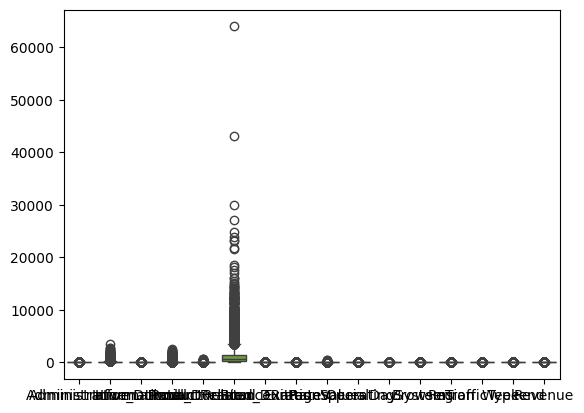

In [13]:
sns.boxplot(df)

<Axes: >

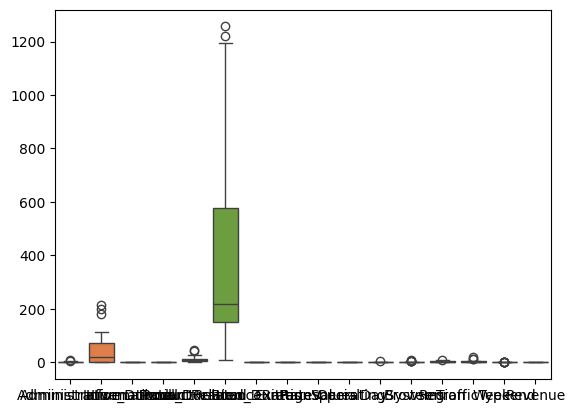

In [14]:
sns.boxplot(df_no_outliers)

In [15]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()

In [16]:
cols = ["Month", "VisitorType", "Weekend", "Revenue"]

for i in cols:
    df_no_outliers[i] = lbl_enc.fit_transform(df_no_outliers[i])



C:\Users\nilesh\AppData\Local\Temp\ipykernel_22032\3984002896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[i] = lbl_enc.fit_transform(df_no_outliers[i])
C:\Users\nilesh\AppData\Local\Temp\ipykernel_22032\3984002896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[i] = lbl_enc.fit_transform(df_no_outliers[i])
C:\Users\nilesh\AppData\Local\Temp\ipykernel_22032\3984002896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [17]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [18]:
df.shape

(12205, 18)

In [19]:
X = df_no_outliers.iloc[:, [5,7]].values

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,19):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\Users\nilesh\anaconda3\envs\mllab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nilesh\anaconda3\envs\mllab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nilesh\anaconda3\envs\mllab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nilesh\anaconda3\envs\mllab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

In [21]:
wcss

[4225914.6295909155,
 1003299.6184623878,
 374968.8579336218,
 211039.12310383684,
 112048.86693438172,
 67740.35789222053,
 44634.969755806276,
 32225.003806632685,
 22708.809410950165,
 13396.441698160002,
 8476.904178670138,
 6733.9474197431755,
 5193.143669743172,
 4133.492078667702,
 3493.159484970106,
 2689.0161983962225,
 2088.34934721141,
 1665.8940237220372]

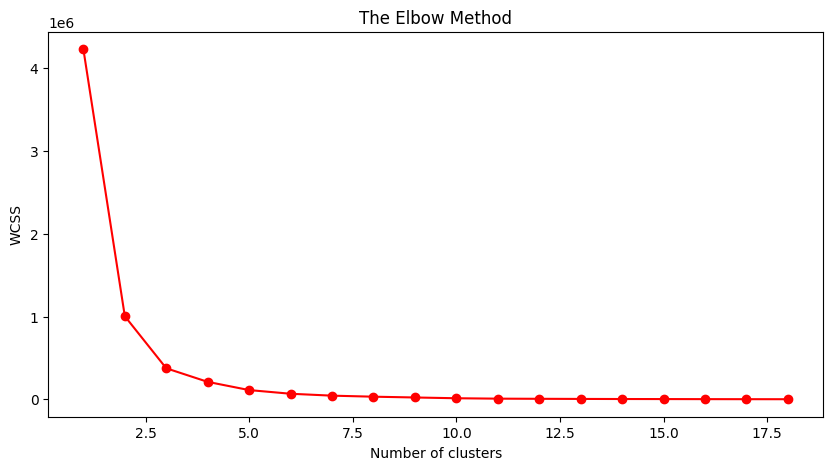

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))


plt.plot(range(1, 19), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [23]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

c:\Users\nilesh\anaconda3\envs\mllab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

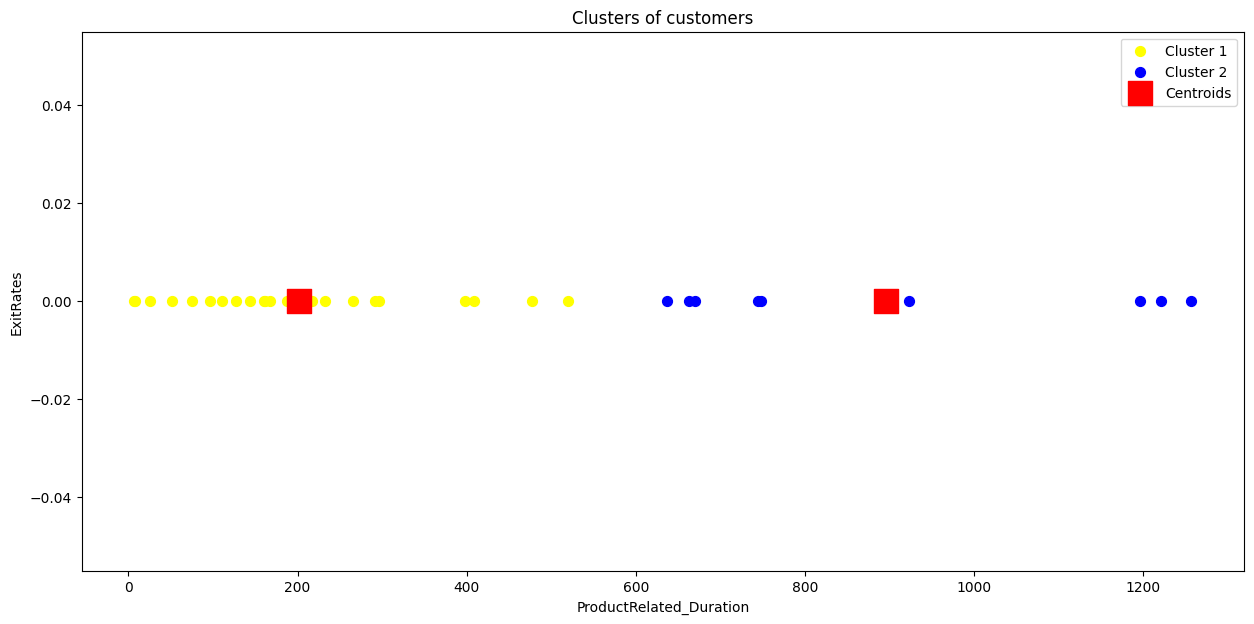

In [25]:
plt.figure(figsize=(15,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('ExitRates')
plt.legend()
plt.show()

CHECK PERFORMACE OF KMEANS, silhouette score - best value = 1, worst value = -1

sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)

Parameters:
X{array-like, sparse matrix} of shape (n_samples_a, n_samples_a) if metric == “precomputed” or (n_samples_a, n_features) otherwise
An array of pairwise distances between samples, or a feature array.

labelsarray-like of shape (n_samples,)
Predicted labels for each sample.

metricstr or callable, default=’euclidean’
The metric to use when calculating distance between instances in a feature array. If metric is a string, it must be one of the options allowed by pairwise_distances. If X is the distance array itself, use metric="precomputed".

sample_sizeint, default=None
The size of the sample to use when computing the Silhouette Coefficient on a random subset of the data. If sample_size is None, no sampling is used.

random_stateint, RandomState instance or None, default=None
Determines random number generation for selecting a subset of samples. Used when sample_size is not None. Pass an int for reproducible results across multiple function calls. See Glossary.

**kwdsoptional keyword parameters
Any further parameters are passed directly to the distance function. If using a scipy.spatial.distance metric, the parameters are still metric dependent. See the scipy docs for usage examples.

In [26]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.fit_predict(X))

c:\Users\nilesh\anaconda3\envs\mllab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6991303676252153